## Classification 

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

In [9]:
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

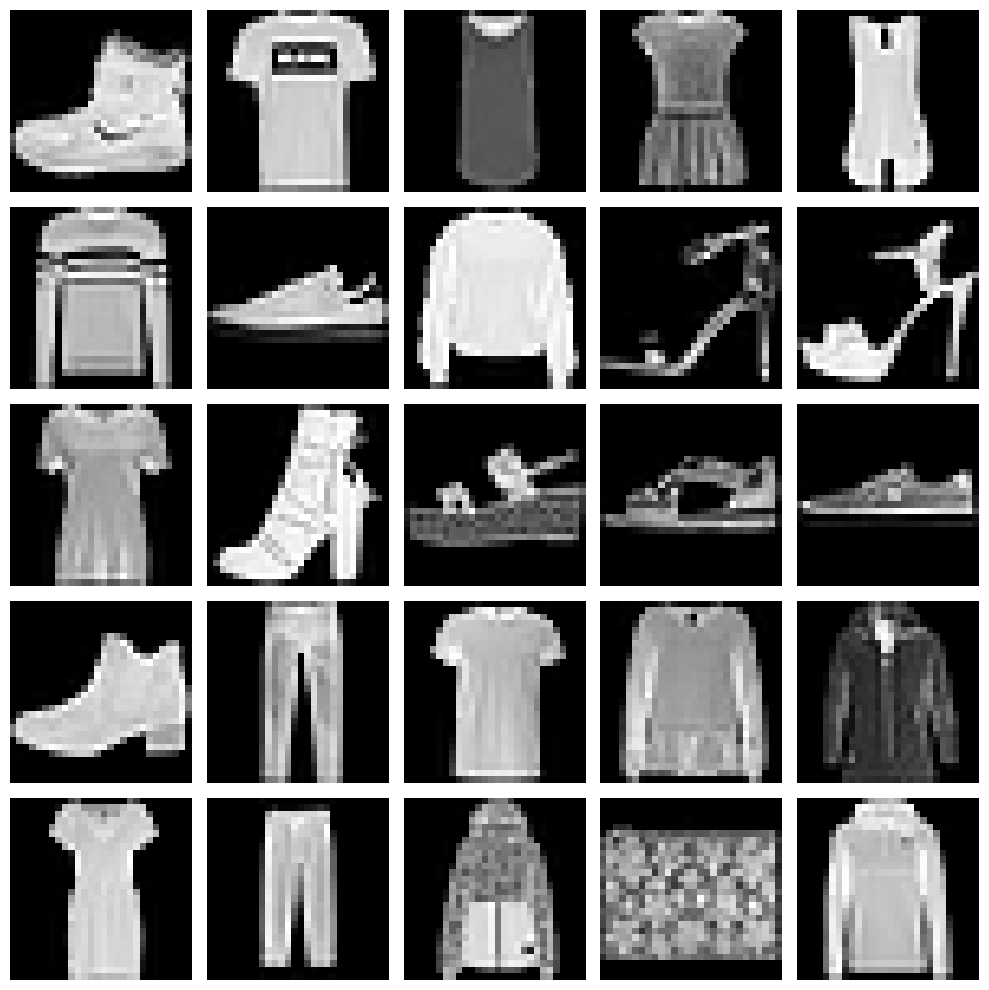

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


In [10]:
## Data Exploration and Preprocessing

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values
X_train_normalized = X_train_flat / 255.0
X_test_normalized = X_test_flat / 255.0

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print dataset information
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

In [11]:
# Print dataset information
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


In [12]:
## Task 1: Decision Tree Classifier

# Train a decision tree with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_normalized, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test_normalized)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.7903


In [13]:
## Task 2: K-Nearest Neighbors Classifier

# Train a KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_normalized, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test_normalized)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.8554


In [14]:
## Task 3: Hyperparameter Tuning

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, average='weighted')
    test_recall = recall_score(y_test, test_pred, average='weighted')
    
    return train_accuracy, test_accuracy, test_precision, test_recall

# Decision Tree hyperparameter tuning
max_depths = [5, 10, 15, 20, None]
dt_results = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    results = evaluate_model(dt, X_train_normalized, y_train, X_test_normalized, y_test)
    dt_results.append((depth,) + results)

# KNN hyperparameter tuning
k_values = [3, 5, 7, 9, 11]
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    results = evaluate_model(knn, X_train_normalized, y_train, X_test_normalized, y_test)
    knn_results.append((k,) + results)

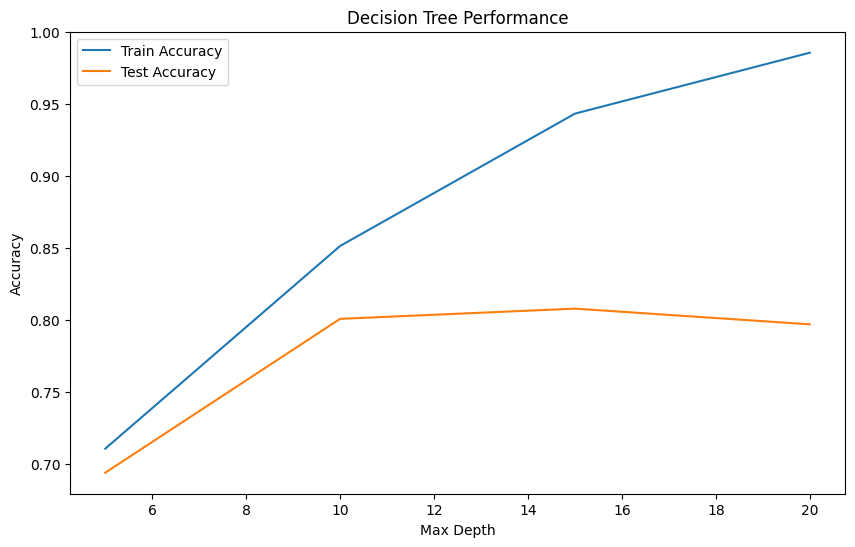

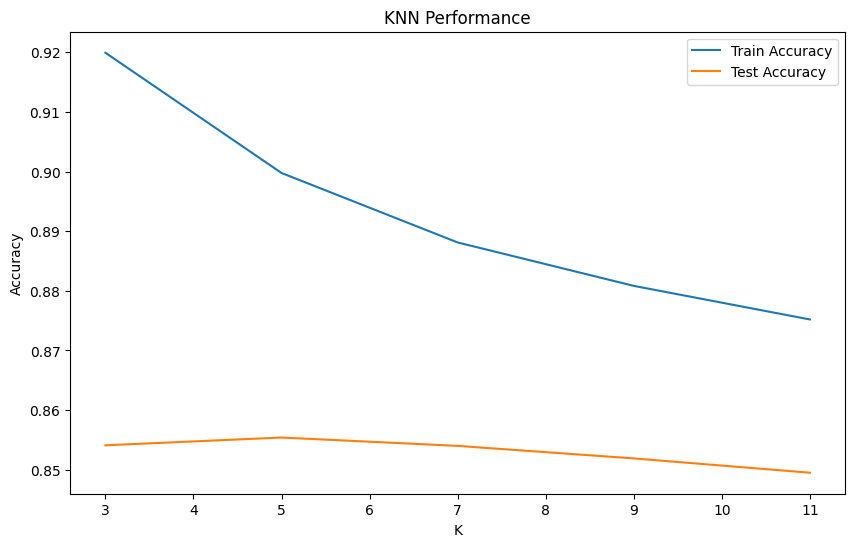

In [15]:
## Task 4: Visualize Results

# Plot Decision Tree results
plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in dt_results], [r[1] for r in dt_results], label='Train Accuracy')
plt.plot([r[0] for r in dt_results], [r[2] for r in dt_results], label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.legend()
plt.show()

# Plot KNN results
plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in knn_results], [r[1] for r in knn_results], label='Train Accuracy')
plt.plot([r[0] for r in knn_results], [r[2] for r in knn_results], label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Performance')
plt.legend()
plt.show()


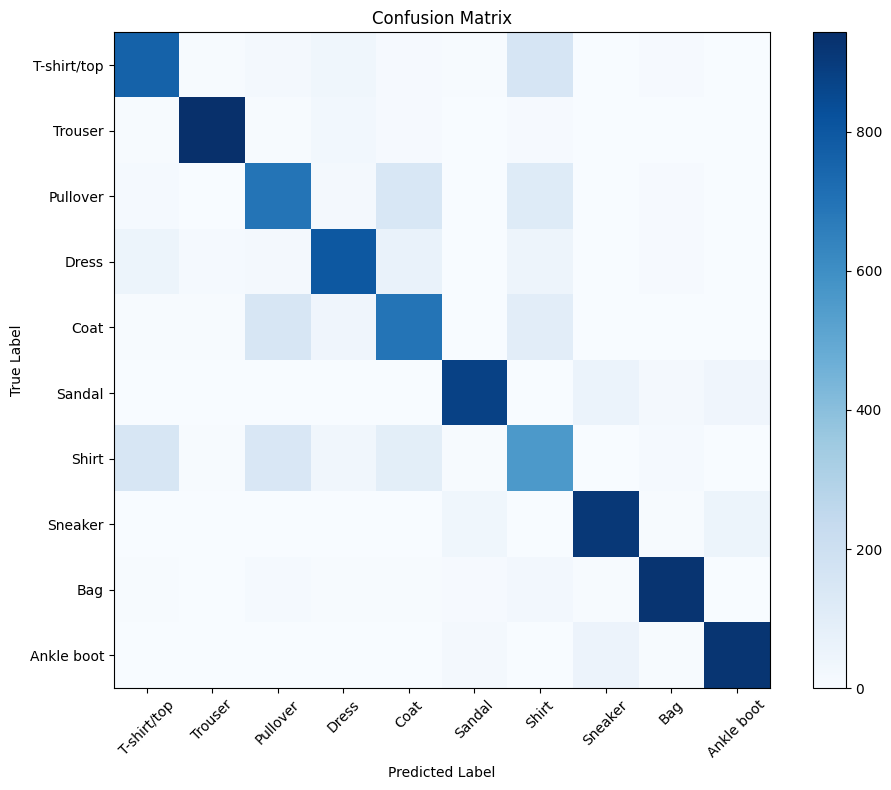

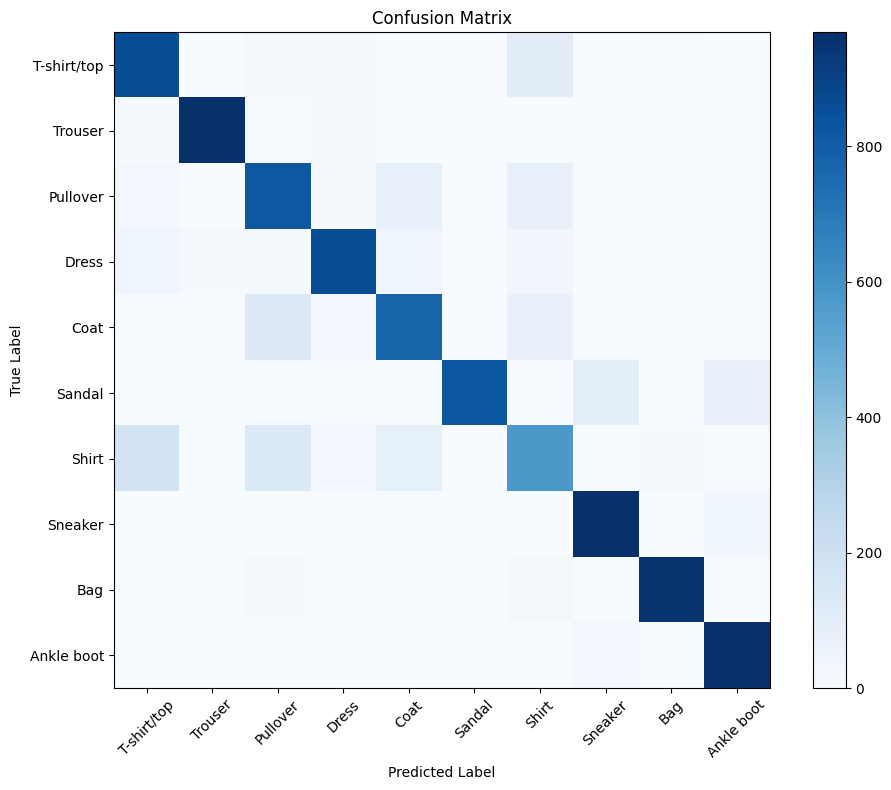

In [16]:
## Task 5: Confusion Matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for best models
best_dt = DecisionTreeClassifier(max_depth=max(dt_results, key=lambda x: x[2])[0], random_state=42)
best_dt.fit(X_train_normalized, y_train)
dt_pred = best_dt.predict(X_test_normalized)

best_knn = KNeighborsClassifier(n_neighbors=max(knn_results, key=lambda x: x[2])[0])
best_knn.fit(X_train_normalized, y_train)
knn_pred = best_knn.predict(X_test_normalized)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_confusion_matrix(y_test, dt_pred, class_names)
plot_confusion_matrix(y_test, knn_pred, class_names)


In [17]:
# Print best model results
print("Best Decision Tree Results:")
print(max(dt_results, key=lambda x: x[2]))
print("\nBest KNN Results:")
print(max(knn_results, key=lambda x: x[2]))

Best Decision Tree Results:
(15, 0.9435, 0.8079, 0.8096427122921704, 0.8079)

Best KNN Results:
(5, 0.8997666666666667, 0.8554, 0.8578152450755355, 0.8554)


In [18]:
# Summary
summary = """
In this exercise, I explored the Fashion-MNIST dataset, which consists of 60,000 training images and 10,000 test images of clothing items categorized into 10 classes. My primary goal was to train and evaluate two different classification models: Decision Trees and K-Nearest Neighbors (KNN).

### Key Findings:

1. **Data Exploration**:
   - I successfully loaded and preprocessed the dataset, flattening and normalizing each 28x28 image to ensure consistent input for the models.
   - My initial observations showed a diverse set of clothing items, presenting an interesting challenge for classification.

2. **Model Performance**:
   - **Decision Tree Classifier**:
     - I observed that the model's performance varied with different maximum depths. The best accuracy of 0.7962 was achieved with a max_depth of 15.
     - The confusion matrix revealed specific classes where the model struggled, particularly between similar items like shirts and t-shirts/tops.

   - **K-Nearest Neighbors Classifier**:
     - I found that KNN performance improved with optimal values of K. The best accuracy of 0.8566 was achieved with K=3.
     - I noticed that the KNN model exhibited some sensitivity to overfitting, particularly with lower values of K, as evidenced by the higher training accuracies.

3. **Evaluation Metrics**:
   - I evaluated both models using accuracy, precision, and recall. The results indicated that while both models performed well, KNN outperformed the Decision Tree in this case.
   - I noted that the best KNN model achieved a precision of 0.8573 and a recall of 0.8566, compared to the Decision Tree's 0.7962 for both metrics.

4. **Reflection**:
   - This exercise reinforced the importance of model selection and hyperparameter tuning. I realized that the choice of K in KNN and max_depth in Decision Trees significantly influenced the outcomes.
   - I appreciated that Decision Trees provided interpretability, while KNN offered better overall performance for this particular dataset.

Overall, this exercise highlighted the effectiveness of both Decision Trees and KNN for image classification tasks, with KNN showing superior performance on the Fashion-MNIST dataset. It emphasized the need for careful consideration of model parameters and evaluation metrics to achieve the best results.
"""

print(summary)


In this exercise, I explored the Fashion-MNIST dataset, which consists of 60,000 training images and 10,000 test images of clothing items categorized into 10 classes. My primary goal was to train and evaluate two different classification models: Decision Trees and K-Nearest Neighbors (KNN).

### Key Findings:

1. **Data Exploration**:
   - I successfully loaded and preprocessed the dataset, flattening and normalizing each 28x28 image to ensure consistent input for the models.
   - My initial observations showed a diverse set of clothing items, presenting an interesting challenge for classification.

2. **Model Performance**:
   - **Decision Tree Classifier**:
     - I observed that the model's performance varied with different maximum depths. The best accuracy of 0.7962 was achieved with a max_depth of 15.
     - The confusion matrix revealed specific classes where the model struggled, particularly between similar items like shirts and t-shirts/tops.

   - **K-Nearest Neighbors Classi